Code to generate the figures accompanying my Medium post: 

https://medium.com/@teresa.kubacka/beyond-the-bar-plot-visualizing-gender-inequality-in-science-7d77f5a01953

In [1]:
%pylab inline

import pandas as pd
import seaborn as sns

from matplotlib.colors import ListedColormap

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = pd.read_csv('Economist_women-research.csv', skiprows = 1, nrows = 12)

Prepare the data

In [4]:
col_rename = {
    '% of women inventores':"Inventors", 
    "Health sciences": "Health Sc.", 
    'Physical sciences': 'Physical Sc.', 
    'Computer science, maths':'Computer Sc., Maths'    
}
data = data.rename(col_rename, axis=1)

country_rename = {
    "United Kingdom": "EUR-UK", 
    "United States": "NAM-USA",
    "Australia":"AU-Australia", 
    "Brazil": "SAM-Brazil", 
    "Canada":"NAM-Canada", 
    "Chile":"SAM-Chile", 
    "Denmark":"EUR-Denmark", 
    "EU28": "EUR-EU28", 
    "France":"EUR-France", 
    "Japan":"AS-Japan", 
    "Mexico":"SAM-Mexico", 
    "Portugal":"EUR-Portugal"    
}

data['Country'] = data['Country'].replace(country_rename)

data = data.set_index('Country').sort_index()
data = data.apply(lambda x: x*100.0).astype(int)
data = data.T


___

## Heatmap

In [60]:
palette_mw = sns.color_palette("Greys_r", 4) + sns.color_palette("Blues", 6)

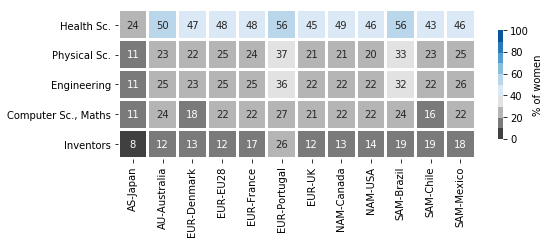

In [62]:
plt.figure(figsize=(8,4))
ax = sns.heatmap(data, vmax=100, vmin=0, center = 50, cmap = palette_mw, square=True, 
           annot=True, linewidths=2, 
           cbar_kws = {"label":"% of women", "shrink":0.5})
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90);

plt.savefig('percent_females3.png', dpi=300, bbox_inches="tight")

___ 

## Waffle plot

In [138]:
def plot_waffle(proportion, axes = gca, numrows=4, numcols = 4, orient = "v", **kwargs):
    
    numfields = numrows*numcols 
    filled = int(round(proportion * numfields))

    filledvec = np.concatenate([np.ones(filled),np.zeros(numfields-filled)])
    if orient == "h":
        filledvec = filledvec.reshape(numrows, numcols)
        filledvec = filledvec
    else: 
        filledvec = filledvec.reshape(numcols, numrows)
        filledvec = filledvec.T 
        if orient != "v": 
            print("invalid orientation, defaulting to vertical")
        
    axes.pcolormesh(filledvec, edgecolors='w', **kwargs)
    axes.set_aspect('equal');
    axes.axis('off');

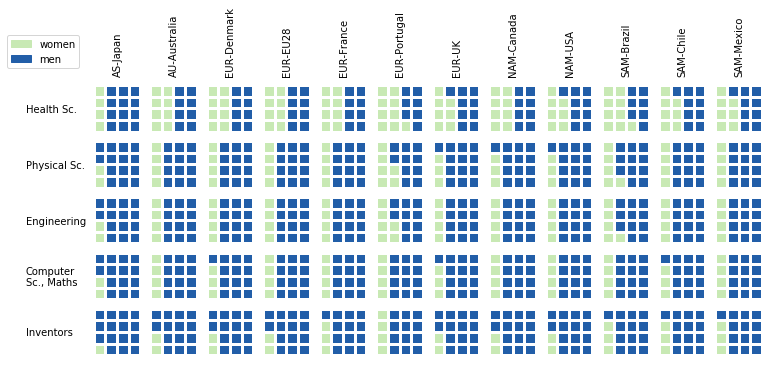

In [518]:
f, a = plt.subplots(nrows = data.shape[0]+1, ncols = data.shape[1]+1, figsize=(13,6))
plt.subplots_adjust(wspace = 0.2, hspace = 0.2)

waffle_params = {"numrows":4, "numcols":4, "orient":"v"}
params = {"linewidth":2, "cmap": ListedColormap(sns.color_palette("YlGnBu_r", 3))}

for row, ax_row in enumerate(a[1:,1:]): 
    for col, ax_col in enumerate(ax_row):
        plot_waffle(data.iloc[row, col]/100, ax_col, **waffle_params, **params)

a[0][0].axis('off')

# print column names
for i, ax in enumerate(a[0,1:]):
    ax.axis('off')
    ax.text(x = 0.5, y = 0, s = data.columns[i], rotation = 90, ha = "center", va="bottom")

# print row labels (df index)
for i, ax in enumerate(a[1:,0]):
    ax.axis('off')
    ax.text(x = -0.25, y = 0.5, s = '\n'.join(wrap(data.index[i], 12)), rotation = 0, va = "center")

# add legend
rect = lambda color: plt.Rectangle((0,0),1,1, color=color)
legend = a[0,0].legend([rect(params['cmap'](2)), rect(params['cmap'](0))], ["women", "men"])
    
plt.savefig('percent_females_waffles2.png', dpi=300, bbox_inches="tight")

___

## Bar plot 

In [287]:
data = data.T.reset_index()

data_mean = pd.DataFrame(data.mean(), columns=['women'])
data_mean['men'] = 100 - data_mean['women']

In [397]:
filled_markers = ['o',
 'v',
 '^',
 '<',
 '>',
 '8',
 's',
 'p',
 '*',
 'h',
 'H',
 'X',
 'D',
 'd',
 "P"
]

In [301]:
pastel2 = sns.color_palette('Pastel2', 2)

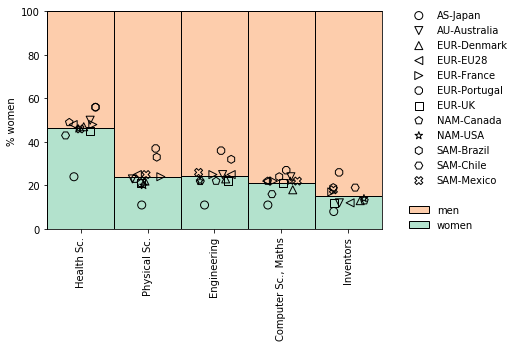

In [506]:
# background bar plot
ax = data_mean.plot.bar(stacked=True, cmap = ListedColormap(pastel2), width=1, edgecolor="k")

# scatterplot for each country
for ind in arange(data.shape[0]):
    sns.stripplot(data=data.iloc[ind:ind+1], 
                  marker=filled_markers[ind], size=8, 
                  edgecolor="k", linewidth=1, 
                  jitter=0.25, 
                  alpha = 1,
                 label=data['Country'].iloc[ind], axes = ax)

# make markers transparent
for paths in ax.collections:
    paths.set_facecolor('None')

# empty plot to get an empty legend entry
plt.plot(np.NaN, np.NaN, '-', color='none', label=' ', axes=ax)

# create legend
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[1:-2:data.shape[1]-1]+handles[0:1]+handles[-2::][::-1], 
           labels[1:-2:data.shape[1]-1]+labels[0:1]+labels[-2::][::-1], 
           loc='right', bbox_to_anchor=(1.4, 0.5), 
          edgecolor="w")

# adjust axes
plt.ylim(0,100)
plt.ylabel('% women')

plt.savefig('percent_females_bar.png', dpi=300, bbox_inches="tight")